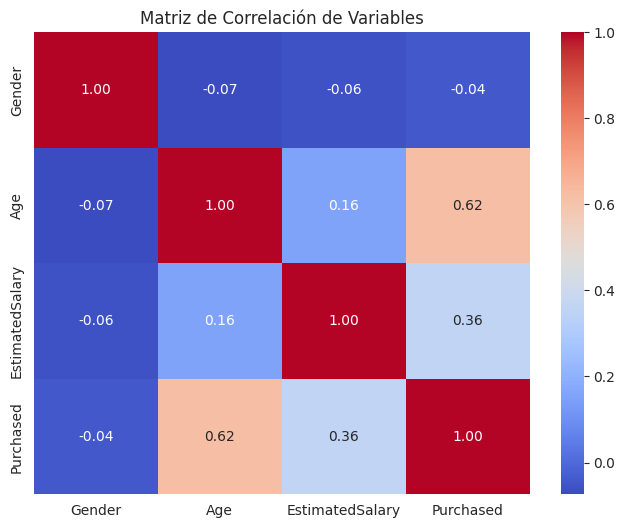


--- REPORTE DE MÉTRICAS: Decision Tree ---
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        52
           1       0.78      0.75      0.76        28

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80


--- REPORTE DE MÉTRICAS: SVM ---
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80


--- REPORTE DE MÉTRICAS: Random Forest ---
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.83      0.86      0.84        28

    accuracy                           0.89        80
   mac

<Figure size 640x480 with 0 Axes>

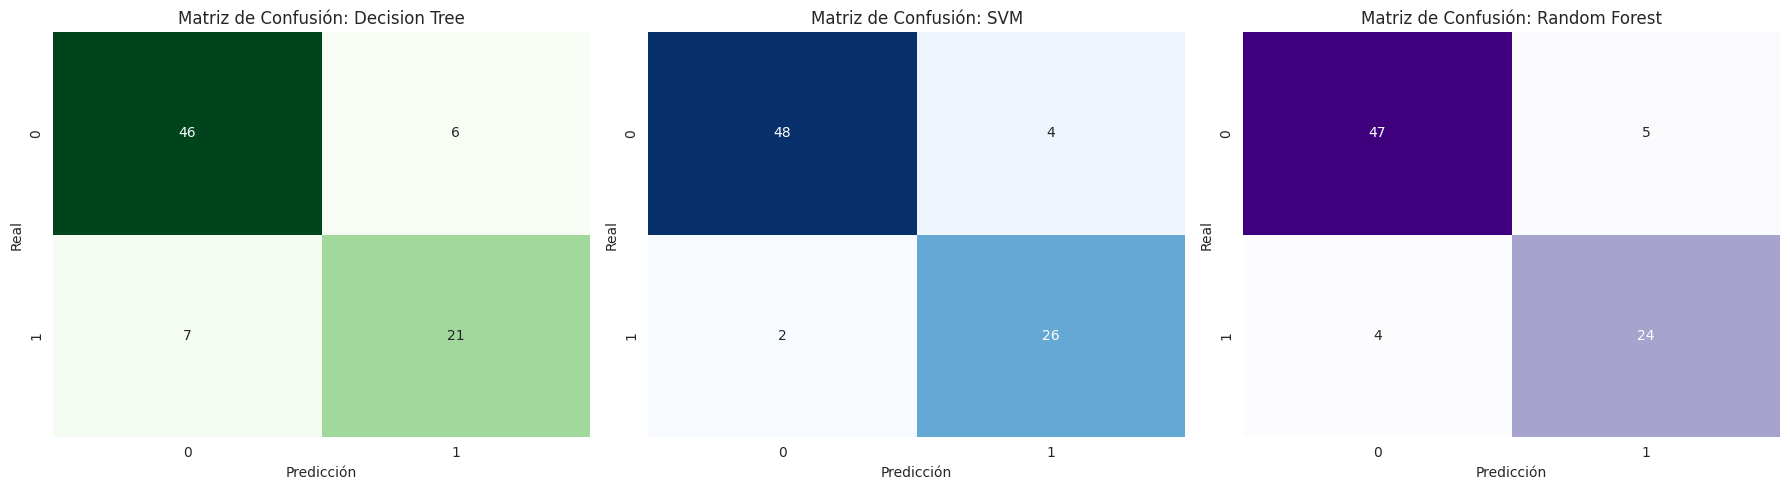

/tmp/ipython-input-2378667477.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Modelo', y='Accuracy', data=df_plot, palette='viridis')


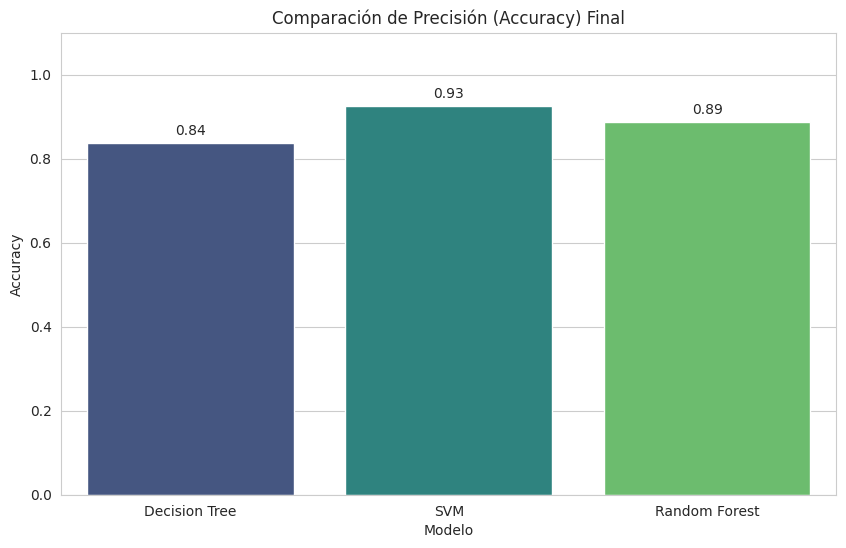

/tmp/ipython-input-2378667477.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=X.columns, palette='magma')


<Figure size 640x480 with 0 Axes>

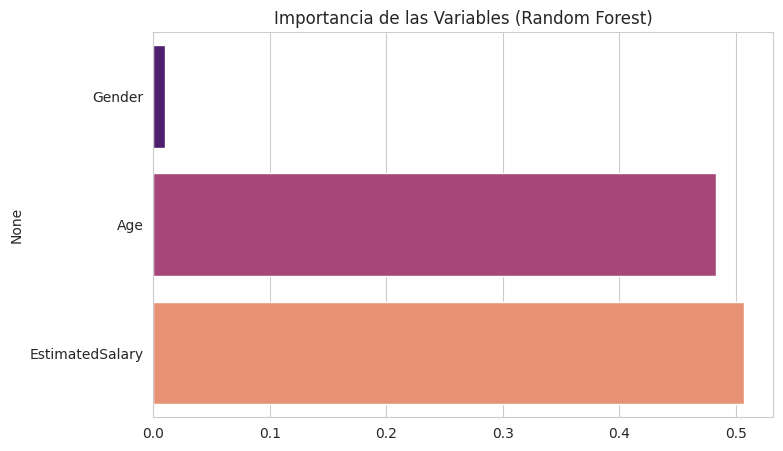


--- TABLA COMPARATIVA FINAL ---
       Modelo  Accuracy  Precision (Compró)  Recall (Compró)  F1-Score
Decision Tree      0.84                0.78             0.75      0.76
          SVM      0.93                0.87             0.93      0.90
Random Forest      0.89                0.83             0.86      0.84


<Figure size 640x480 with 0 Axes>

In [3]:
# ==========================================
# 1. IMPORTACIÓN DE LIBRERÍAS
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Configuración de estilo
sns.set_style("whitegrid")

# ==========================================
# 2. CARGA Y PREPROCESAMIENTO
# ==========================================
df = pd.read_csv("Social_Network_Ads.csv")

# Eliminamos 'User ID' si existe
if 'User ID' in df.columns:
    df = df.drop('User ID', axis=1)

# Codificación de Género
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# División de variables (X, y)
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# División Entrenamiento/Prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Escalado de variables (Crítico para SVM)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ==========================================
# 3. ANÁLISIS EXPLORATORIO (EDA)
# ==========================================
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables')
plt.show()
plt.savefig('MatrizCorrelacionesVariables.png')

# ==========================================
# 4. MODELADO Y EVALUACIÓN
# ==========================================
models = {
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

# Entrenamiento y obtención de métricas en un solo bucle
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Report": classification_report(y_test, y_pred, output_dict=True),
        "Matrix": confusion_matrix(y_test, y_pred),
        "Predictions": y_pred
    }

# ==========================================
# 5. VISUALIZACIÓN DE RESULTADOS
# ==========================================

# A. Matrices de Confusión (Comparativa)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
cmaps = ['Greens', 'Blues', 'Purples']

for i, (name, data) in enumerate(results.items()):
    sns.heatmap(data["Matrix"], annot=True, fmt='d', ax=axes[i], cmap=cmaps[i], cbar=False)
    axes[i].set_title(f'Matriz de Confusión: {name}')
    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Real')

    plt.savefig('MatricesConfusion.png')
    # Imprimir Reporte en consola
    print(f"\n--- REPORTE DE MÉTRICAS: {name} ---")
    print(classification_report(y_test, data["Predictions"]))

plt.tight_layout()
plt.show()

# B. Comparación de Accuracy (Gráfico de Barras)
df_plot = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Accuracy': [results[m]["Accuracy"] for m in results]
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Modelo', y='Accuracy', data=df_plot, palette='viridis')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Comparación de Precisión (Accuracy) Final')
plt.ylim(0, 1.1)
plt.show()
plt.savefig('ComparacionAccuray.png')

# C. Importancia de Variables (Random Forest)
importances = models["Random Forest"].feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=X.columns, palette='magma')
plt.title('Importancia de las Variables (Random Forest)')
plt.show()
plt.savefig('ImportanciaRandomForest.png')

# ==========================================
# 6. TABLA RESUMEN FINAL
# ==========================================
tabla_metrics = []
for name, data in results.items():
    tabla_metrics.append({
        "Modelo": name,
        "Accuracy": round(data["Accuracy"], 2),
        "Precision (Compró)": round(data["Report"]["1"]["precision"], 2),
        "Recall (Compró)": round(data["Report"]["1"]["recall"], 2),
        "F1-Score": round(data["Report"]["1"]["f1-score"], 2)
    })

df_resumen = pd.DataFrame(tabla_metrics)
print("\n--- TABLA COMPARATIVA FINAL ---")
print(df_resumen.to_string(index=False))